In [3]:
import awkward as ak
import hist
import numpy as np
import vector

import pylhe

# axion signal events

In [ ]:
pylhe.register_awkward()
arr = pylhe.to_awkward(pylhe.read_lhe_with_attributes("../ALPtt/Events/run_08/unweighted_events.lhe"))

In [5]:
f = open("../ALPtt/Events/run_08/unweighted_events.lhe", "r")
content = f.readlines()
f.close() 

line = content[443]
sigma = float(line.split(" ")[0]) # cross section in pb
print(sigma)

0.0001978536


In [6]:
lumi = 13.3e3 #luminosity in inverse picobars
NMG = 10000 #number of events generated in madgraph
WW = sigma*lumi/NMG

### particle positions:
electron e- (11): position 10,
positron e+ (-11): position 7,
b quark b (5): position 6,
anti-b quark b~: position 9 

In [7]:
deltaR1 = arr.particles.vector[:,6].deltaR(arr.particles.vector[:,7])
deltaR2 = arr.particles.vector[:,9].deltaR(arr.particles.vector[:,10])
deltaR3 = arr.particles.vector[:,6].deltaR(arr.particles.vector[:,10])
deltaR4 = arr.particles.vector[:,9].deltaR(arr.particles.vector[:,7])

In [8]:
print(deltaR1)
print(deltaR2)
print(deltaR3)
print(deltaR4)

[3.84, 0.782, 3.05, 1.66, 1.08, 2.23, 0.281, ... 2.01, 2.04, 2.88, 1.43, 2.82, 1.72]
[2.37, 1.04, 1.68, 2.62, 1.87, 0.461, 3.36, ... 2.62, 3.4, 1.83, 1.56, 1.42, 2.03]
[2.76, 3.11, 4.17, 2.66, 2.79, 3.22, 2.86, ... 0.884, 2.97, 5.17, 1.83, 2.3, 2.27]
[2.89, 3.03, 0.729, 3.99, 2.75, 2.59, 0.666, ... 3.57, 2.29, 1.25, 2.68, 1.56, 1.85]


In [9]:
deltaR = np.zeros(NMG);
for i in range(0,NMG,1):
    deltaR[i] = min(deltaR1[i], deltaR2[i], deltaR3[i], deltaR4[i])
    

In [10]:
print(deltaR)

[2.36655464 0.78226812 0.72926834 ... 2.27415181 2.08378705 1.26111315]


# background

In [13]:
pylhe.register_awkward()
arr_b = pylhe.to_awkward(pylhe.read_lhe_with_attributes("../ppttleptonic/Events/run_02/unweighted_events.lhe"))

In [14]:
deltaR1_b = arr.particles.vector[:,6].deltaR(arr_b.particles.vector[:,7])
deltaR2_b = arr.particles.vector[:,9].deltaR(arr_b.particles.vector[:,10])
deltaR3_b = arr.particles.vector[:,6].deltaR(arr_b.particles.vector[:,10])
deltaR4_b = arr.particles.vector[:,9].deltaR(arr_b.particles.vector[:,7])

In [15]:
deltaR_b = np.zeros(NMG);
for i in range(0,NMG,1):
    deltaR_b[i] = min(deltaR1_b[i], deltaR2_b[i], deltaR3_b[i], deltaR4_b[i])

# produce histogram

In [36]:
num_bins = 30
max_bins = 5

In [37]:
axis1 = hist.axis.Regular(bins=num_bins, start=0, stop=max_bins, name="deltaR")
storage = hist.storage.Weight()
hist1 = hist.Hist(axis1, storage=storage)
hist1.fill(deltaR);

In [38]:
axis2 = hist.axis.Regular(bins=num_bins, start=0, stop=max_bins, name="deltaR")
storage = hist.storage.Weight()
hist2 = hist.Hist(axis2, storage=storage)
hist2.fill(deltaR_b);

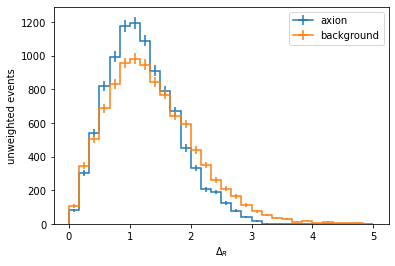

In [39]:
artists1 = hist1.plot1d(label = 'axion');
artist2 = hist2.plot1d(label = 'background')
ax = artists1[0].stairs.axes;
ax.set_yscale("linear");
ax.set_xlabel("$\Delta_R$");
ax.set_ylabel("unweighted events");
ax.legend()